# importing libararies 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline 
pd.options.display.float_format = '{:,.2f}'.format

# Importing Loan.CSV

In [3]:
df = pd.read_csv('loan.csv', sep = ',', encoding='ISO-8859-1', low_memory = False)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [5]:
df.shape
# 39717 rows and 111 colums 
                    

(39717, 111)

# Data Cleaning 

#### Removing uncessary columns 

In [6]:
# Dropping Columns that will not be used for analysis, some of the have only one values
df.drop(['id', 'member_id', 'url', 'title', 'desc', 'emp_title','chargeoff_within_12_mths','collections_12_mths_ex_med','acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status','delinq_amnt', 'pymnt_plan', 'tax_liens', 'zip_code'], inplace=True , axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 95 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       39717 non-null  int64  
 1   funded_amnt                     39717 non-null  int64  
 2   funded_amnt_inv                 39717 non-null  float64
 3   term                            39717 non-null  object 
 4   int_rate                        39717 non-null  object 
 5   installment                     39717 non-null  float64
 6   grade                           39717 non-null  object 
 7   sub_grade                       39717 non-null  object 
 8   emp_length                      38642 non-null  object 
 9   home_ownership                  39717 non-null  object 
 10  annual_inc                      39717 non-null  float64
 11  verification_status             39717 non-null  object 
 12  issue_d                         

In [8]:
df.size

3773115

In [9]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00",...,0.00,0.00,0.00,0.00,0.00,"39,020.00",0.00,0.00,0.00,0.00
mean,"11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,...,nan,nan,nan,nan,nan,0.04,nan,nan,nan,nan
std,"7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,...,nan,nan,nan,nan,nan,0.20,nan,nan,nan,nan
min,500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
25%,"5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
50%,"10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
75%,"15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,52.00,104.00,...,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
max,"35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,120.00,129.00,...,nan,nan,nan,nan,nan,2.00,nan,nan,nan,nan


In [10]:
# Checking for columns for missing values with percentage 


In [11]:
null_df = df.isnull().sum()
null_cent = (null_df/len(df))*100
null_check = pd.concat([null_df, null_cent], axis=1)
null_check[null_check[1]>0]

,0,1
emp_length,1075,2.71
mths_since_last_delinq,25682,64.66
mths_since_last_record,36931,92.99
revol_util,50,0.13
last_pymnt_d,71,0.18
...,...,...
pub_rec_bankruptcies,697,1.75
tot_hi_cred_lim,39717,100.00
total_bal_ex_mort,39717,100.00
total_bc_limit,39717,100.00


In [12]:
len(df)

39717

In [13]:
#columns with more than 50% missing values 
missing_col = null_check[null_check[1]>50]
missing_col

,0,1
mths_since_last_delinq,25682,64.66
mths_since_last_record,36931,92.99
next_pymnt_d,38577,97.13
mths_since_last_major_derog,39717,100.00
annual_inc_joint,39717,100.00
dti_joint,39717,100.00
verification_status_joint,39717,100.00
tot_coll_amt,39717,100.00
tot_cur_bal,39717,100.00
open_acc_6m,39717,100.00


In [14]:
len(missing_col)

57

In [15]:
df.drop(list(missing_col.index), inplace = True, axis = 1)

In [16]:
df.shape

(39717, 38)

# identifying which features can be removed 

In [17]:
check=  ((df.isnull().sum()/len(df))*100 )
check[check>0]

emp_length             2.71
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

In [18]:
df.shape

(39717, 38)

'emp_length' = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [19]:
print(df['emp_length'].value_counts())
print('\n')
print('unique values in emp_length: ' , df['emp_length'].nunique())
print('Total missing values: ', df['emp_length'].isnull().sum())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


unique values in emp_length:  11
Total missing values:  1075


In [20]:
# emp_length can be kept but fixing null values will be biased 

# removing rows from emp_length column which contains null values
df = df[~(df['emp_length'].isnull())]

***'title'*** = The loan title provided by the borrower

'revol_util' = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [21]:
print(df['revol_util'].value_counts())
print('\n')
print('unique values in revol_util: ', df['revol_util'].nunique())
print('total missing values: ', df['revol_util'].isnull().sum())

0%        941
0.20%      62
63%        61
40.70%     57
66.70%     57
         ... 
57.56%      1
7.64%       1
37.63%      1
8.58%       1
3.18%       1
Name: revol_util, Length: 1087, dtype: int64


unique values in revol_util:  1087
total missing values:  47


In [22]:
# removing rows from revol_util which contains missing values
df = df[~(df['revol_util'].isnull())]

'last_pymnt_d' = Last month payment was received

In [23]:
print(df['last_pymnt_d'].value_counts())
print('\n')
print('Uniques values in last_pymnt_d: ', df['last_pymnt_d'].nunique())
print('total missing values: ', df['last_pymnt_d'].isnull().sum())

May-16    1209
Mar-13     999
Dec-14     910
May-13     884
Feb-13     845
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64


Uniques values in last_pymnt_d:  101
total missing values:  62


In [24]:
# Imputing data to the column will add bias

# removing rows from last_pymnt_d which contains missing values

df = df[~(df['last_pymnt_d'].isnull())]


'last_credit_pull_d' = The most recent month LC pulled credit for this loan

In [25]:
print(df['last_credit_pull_d'].value_counts())
print("\n")
print('Unique values in last_credit_pull_d: ',df['last_credit_pull_d'].nunique())
print('Total missing values: ',df['last_credit_pull_d'].isnull().sum())

May-16    10036
Apr-16     2476
Mar-16     1094
Feb-13      831
Feb-16      714
          ...  
Jun-08        1
May-08        1
May-07        1
Jul-08        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64


Unique values in last_credit_pull_d:  106
Total missing values:  2


In [26]:
# There are only two missing values which can be deleted

# Deleting rows with missing values
df = df[~(df['last_pymnt_d'].isnull())]


'pub_rec_bankruptcies' = Number of public record bankruptcies

In [27]:
print(df['pub_rec_bankruptcies'].value_counts())
print("\n")
print('Unique values in pub_rec_bankruptcies: ',df['pub_rec_bankruptcies'].nunique())
print('Total missing values: ',df['pub_rec_bankruptcies'].isnull().sum())

0.00    36273
1.00     1556
2.00        7
Name: pub_rec_bankruptcies, dtype: int64


Unique values in pub_rec_bankruptcies:  3
Total missing values:  697


pub_rec_bankruptcies has 1.75% of missing rows which is a small percentage, therefore the Number of public record bankruptcies can be imputed with the mode of the column

In [28]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])

Checking features which has only one value in the column

In [29]:
df.nunique().sort_values(ascending=True)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             515
loan_amnt                    879
funded_amnt                 1037
revol_util                  1087
out_prncp                   1096
out_prncp_inv               1097
total_rec_late_fee          1327
collection_recovery_fee     2519
dti                         2863
recoveries                  3852
annual_inc                  5091
total_rec_

Dataframe after removing of missing values['acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status','delinq_amnt', 'pymnt_plan']

In [30]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,...,"5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,"1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,...,"3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,...,"12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,1 year,RENT,...,"3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,"1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,0.00
39713,8500,8500,875.00,36 months,10.28%,275.38,C,C1,3 years,RENT,...,"1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,Jul-10,281.94,Jul-10,0.00
39714,5000,5000,"1,325.00",36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,"1,397.12","5,000.00",272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,0.00
39715,5000,5000,650.00,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,672.66,"5,000.00",174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,0.00


Checking data types in each columns 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38533 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38533 non-null  int64  
 1   funded_amnt              38533 non-null  int64  
 2   funded_amnt_inv          38533 non-null  float64
 3   term                     38533 non-null  object 
 4   int_rate                 38533 non-null  object 
 5   installment              38533 non-null  float64
 6   grade                    38533 non-null  object 
 7   sub_grade                38533 non-null  object 
 8   emp_length               38533 non-null  object 
 9   home_ownership           38533 non-null  object 
 10  annual_inc               38533 non-null  float64
 11  verification_status      38533 non-null  object 
 12  issue_d                  38533 non-null  object 
 13  loan_status              38533 non-null  object 
 14  purpose               

Standarizing Dates columns 

In [32]:
# Standarize the date column


df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38533 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38533 non-null  int64         
 1   funded_amnt              38533 non-null  int64         
 2   funded_amnt_inv          38533 non-null  float64       
 3   term                     38533 non-null  object        
 4   int_rate                 38533 non-null  object        
 5   installment              38533 non-null  float64       
 6   grade                    38533 non-null  object        
 7   sub_grade                38533 non-null  object        
 8   emp_length               38533 non-null  object        
 9   home_ownership           38533 non-null  object        
 10  annual_inc               38533 non-null  float64       
 11  verification_status      38533 non-null  object        
 12  issue_d                  38533 n

'earliest_cr_line': The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

In [34]:
df['earliest_cr_line'].value_counts()

1998-11-01    365
1999-10-01    361
1998-12-01    340
2000-10-01    335
1997-12-01    318
             ... 
2066-12-01      1
1969-04-01      1
2063-10-01      1
2064-04-01      1
2063-09-01      1
Name: earliest_cr_line, Length: 515, dtype: int64

In [35]:
# checking earliest_cr_line post 2011

# transforming column to year and month column

df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month

In [36]:
df[df['earliest_cr_line_year']<2011]['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1973, 1979, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 1974], dtype=int64)

In [37]:
df[df['earliest_cr_line_year']>2011]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2064, 2062, 2056, 2046, 2050, 2054],
      dtype=int64)

In [38]:
len(df[df['earliest_cr_line_year']>2011])

61

Year for 61 rows  has been inappropriately represented  

In [39]:
# fixing year values in column

df['earliest_cr_line_year'] = df['earliest_cr_line_year'].apply(lambda x: (x-100) if x>2012 else x)

In [40]:
len(df[df['earliest_cr_line_year']>2011])

0

In [41]:
df.select_dtypes(include=['object'])

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,revol_util
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Fully Paid,credit_card,AZ,83.70%
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Charged Off,car,GA,9.40%
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Fully Paid,small_business,IL,98.50%
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Fully Paid,other,CA,21%
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Current,other,OR,53.90%
...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,4 years,MORTGAGE,Not Verified,Fully Paid,home_improvement,CO,13.10%
39713,36 months,10.28%,C,C1,3 years,RENT,Not Verified,Fully Paid,credit_card,NC,26.90%
39714,36 months,8.07%,A,A4,< 1 year,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,MA,19.40%
39715,36 months,7.43%,A,A2,< 1 year,MORTGAGE,Not Verified,Fully Paid,other,MD,0.70%


In [42]:
# function to convert percentage to float 
def p2f(x):
    return float(x.strip('%'))

In [43]:
# removing % and converting int_rate column to float 
df['int_rate'] = df['int_rate'].apply(lambda x: p2f(x))

In [44]:
df['int_rate'].isnull().sum()

0

In [45]:
# converting emp_length into numerical value

df['emp_length'].value_counts()

10+ years    8869
< 1 year     4564
2 years      4377
3 years      4084
4 years      3422
5 years      3269
1 year       3225
6 years      2225
7 years      1769
8 years      1474
9 years      1255
Name: emp_length, dtype: int64

In [46]:
# using emp_length_dict dictionary to replace values
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

df = df.replace({'emp_length': emp_length_dict})


In [47]:
df['emp_length'].value_counts()

10    8869
0     4564
2     4377
3     4084
4     3422
5     3269
1     3225
6     2225
7     1769
8     1474
9     1255
Name: emp_length, dtype: int64

In [48]:
df['emp_length'].nunique()

11

In [49]:
df['purpose'].value_counts()

debt_consolidation    18204
credit_card            4996
other                  3813
home_improvement       2873
major_purchase         2104
small_business         1775
car                    1495
wedding                 927
medical                 666
moving                  557
house                   366
vacation                351
educational             312
renewable_energy         94
Name: purpose, dtype: int64

from the purpose column, the values - home_improvement and house seems almost same and can be seen as one

In [50]:
# replacing home_imporvement to house in purpose column

df['purpose'] = df['purpose'].apply(lambda x: 'house' if x in(['home_improvement']) else x)

In [51]:
df['purpose'].value_counts()

debt_consolidation    18204
credit_card            4996
other                  3813
house                  3239
major_purchase         2104
small_business         1775
car                    1495
wedding                 927
medical                 666
moving                  557
vacation                351
educational             312
renewable_energy         94
Name: purpose, dtype: int64

In [52]:
df['home_ownership'].value_counts()

RENT        18411
MORTGAGE    17190
OWN          2833
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [53]:
# home_ownership column contains 3 values which is none. converting it to other
df['home_ownership'] = df['home_ownership'].replace('NONE', 'OTHER')

In [54]:
df['home_ownership'].value_counts()

RENT        18411
MORTGAGE    17190
OWN          2833
OTHER          99
Name: home_ownership, dtype: int64

In [55]:
df['revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38533, dtype: object

In [56]:
# fetching revol_util by removing % and converting it to float


df['revol_util'] = df['revol_util'].apply(lambda x: p2f(x))

There are possibilities that the dataset contains duplicate rows

In [57]:
# Deleting duplicated rows from the dataset if any

df = df.drop_duplicates()

In [58]:
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']]

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000,5000,"4,975.00"
1,2500,2500,"2,500.00"
2,2400,2400,"2,400.00"
3,10000,10000,"10,000.00"
4,3000,3000,"3,000.00"
...,...,...,...
39712,2500,2500,"1,075.00"
39713,8500,8500,875.00
39714,5000,5000,"1,325.00"
39715,5000,5000,650.00


In [59]:
df[df['loan_amnt']!=df['funded_amnt']].shape

(1816, 40)

In [60]:
df[df['loan_amnt']!=df['funded_amnt_inv']].shape

(19776, 40)

In [61]:
# Dropping these columns - funded_amnt and funded_amnt_inv as these two columns seems not significance

df = df.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)

In [62]:
# shape of the final dataframe which can be used for analysis

df.shape

(38533, 38)

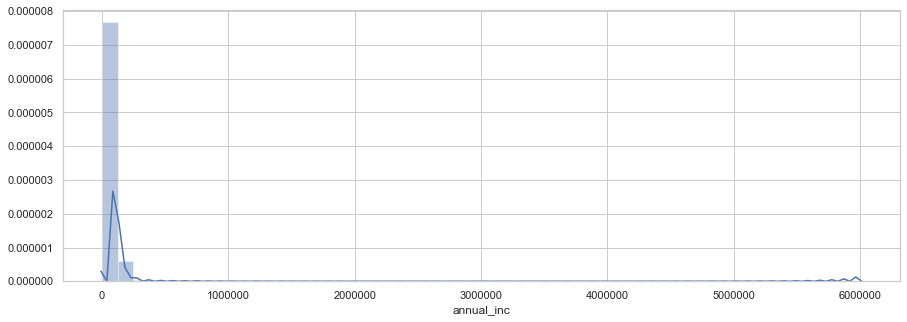

In [63]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'])

plt.show()

In [64]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month
0,5000,36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,1985,1
1,2500,60 months,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,1999,4
2,2400,36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,2001,11
3,10000,36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,...,"2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,1996,2
4,3000,60 months,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,...,"1,037.39",0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.00,1996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,"110,000.00",Not Verified,...,322.97,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,0.00,1990,11
39713,8500,36 months,10.28,275.38,C,C1,3,RENT,"18,000.00",Not Verified,...,"1,413.49",0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,0.00,1986,12
39714,5000,36 months,8.07,156.84,A,A4,0,MORTGAGE,"100,000.00",Not Verified,...,272.16,0.00,0.00,0.00,2008-04-01,0.00,2007-06-01,0.00,1998,10
39715,5000,36 months,7.43,155.38,A,A2,0,MORTGAGE,"200,000.00",Not Verified,...,174.20,0.00,0.00,0.00,2008-01-01,0.00,2007-06-01,0.00,1988,11


In [65]:
df.annual_inc.describe()
3*df.std()

#lets remove all the row with annual income outside 2 lakh as it will add bias to our anaysis 

loan_amnt                  22,381.74
int_rate                       11.15
installment                   627.29
emp_length                     10.69
annual_inc                192,858.89
dti                            20.00
delinq_2yrs                     1.48
inq_last_6mths                  3.21
open_acc                       13.18
pub_rec                         0.70
revol_bal                  47,770.72
revol_util                     84.92
total_acc                      34.17
out_prncp                   1,131.36
out_prncp_inv               1,127.23
total_pymnt                27,155.53
total_pymnt_inv            26,873.74
total_rec_prncp            21,211.57
total_rec_int               7,850.85
total_rec_late_fee             22.02
recoveries                  2,074.54
collection_recovery_fee       448.62
last_pymnt_amnt            13,415.72
pub_rec_bankruptcies            0.60
earliest_cr_line_year          19.91
earliest_cr_line_month         10.62
dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


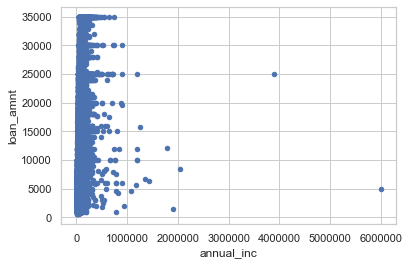

In [66]:
#There are some outlies for annual income. we will delete rows containing annual income beyond minus 3 sigma to plus three sigma for annual income
df.plot.scatter(x = 'annual_inc' , y = 'loan_amnt')

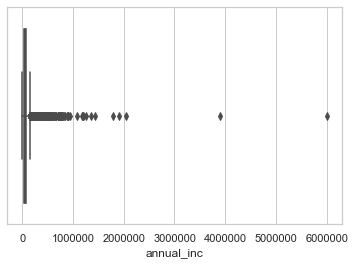

In [67]:
sns.boxplot(x=df['annual_inc'], data=df)

In [68]:
df = df[df.annual_inc <= 200000]

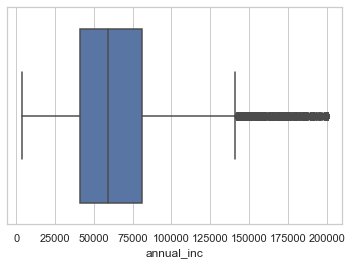

In [69]:
sns.boxplot(x=df['annual_inc'], data=df)

In [70]:
#df.to_excel('cleaned_data.xls') 
#exporting cleaned data to have look in excel for understanding

# Univariate Analysis

In [71]:
df['loan_status'].value_counts()

Fully Paid     31611
Charged Off     5263
Current         1082
Name: loan_status, dtype: int64

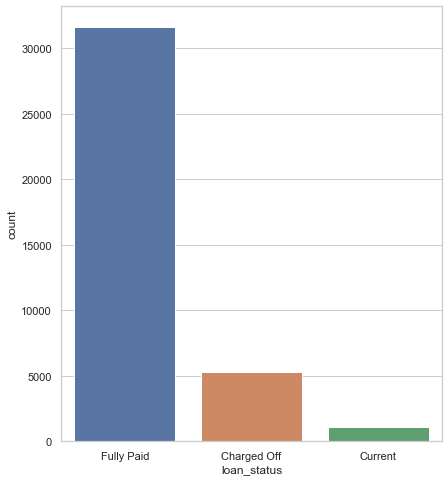

In [72]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)

sns.countplot(df['loan_status'])

lets focus on target variable 'loan status' excluding 'current staus' 

In [73]:
# Creating a dataset called 'loan' which has loan status as 'Fully paid' and 'Charged off'
target_var = ['Fully Paid', 'Charged Off']
loan = df[df['loan_status'].isin(target_var)]

In [74]:
# replacing target variable loan_status with values 'Fully Paid' and charged off to 0 and 1 respectively
#loan['loan_status'].replace(to_replace = ['Fully Paid', 'Charged Off'], value = [0,1], inplace = True)

In [75]:
loan['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 36874, dtype: object

In [76]:
loan.shape

(36874, 38)

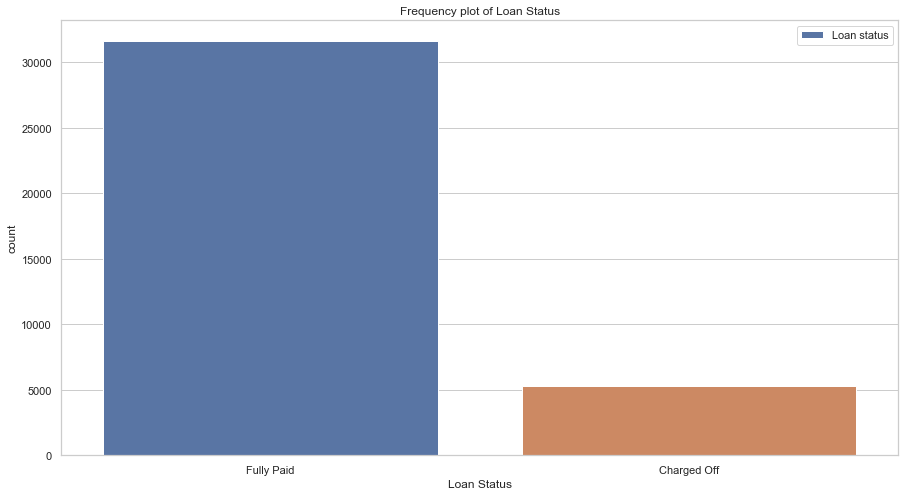

In [77]:
plt.figure(figsize=(15,8))
sns.countplot(x='loan_status', data=loan)
plt.title("Frequency plot of Loan Status")
plt.xlabel('Loan Status')
plt.legend(labels=['Loan status'])
plt.show()

In [78]:
loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month
0,5000,36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,1985,1
1,2500,60 months,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,1999,4
2,2400,36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,2001,11
3,10000,36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,...,"2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,1996,2
5,5000,36 months,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,...,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,2004,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,"110,000.00",Not Verified,...,322.97,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,0.00,1990,11
39713,8500,36 months,10.28,275.38,C,C1,3,RENT,"18,000.00",Not Verified,...,"1,413.49",0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,0.00,1986,12
39714,5000,36 months,8.07,156.84,A,A4,0,MORTGAGE,"100,000.00",Not Verified,...,272.16,0.00,0.00,0.00,2008-04-01,0.00,2007-06-01,0.00,1998,10
39715,5000,36 months,7.43,155.38,A,A2,0,MORTGAGE,"200,000.00",Not Verified,...,174.20,0.00,0.00,0.00,2008-01-01,0.00,2007-06-01,0.00,1988,11


In [79]:
# Percentage of loan by count 
charged_off_percent = round(loan[loan['loan_status']=='Charged Off']['loan_status'].count()*100/len(loan), 2)
fully_paid_percent = round(loan[loan['loan_status']=='Fully Paid']['loan_status'].count()*100/len(loan), 2)
print(f"Percentage of loan Charged Off: {charged_off_percent}%")
print(f"Percentage of loan Fully Paid: {fully_paid_percent}%")

Percentage of loan Charged Off: 14.27%
Percentage of loan Fully Paid: 85.73%


In [80]:
# percentage of loan by amount
charged_off_percent_amount = round(loan.groupby('loan_status')['total_pymnt'].sum()*100/sum(loan['loan_amnt']), 2)
charged_off_percent_amount

loan_status
Charged Off    8.99
Fully Paid    98.57
Name: total_pymnt, dtype: float64

Observation : 14.22% of people were charged of with 8.94% of total lended amount 

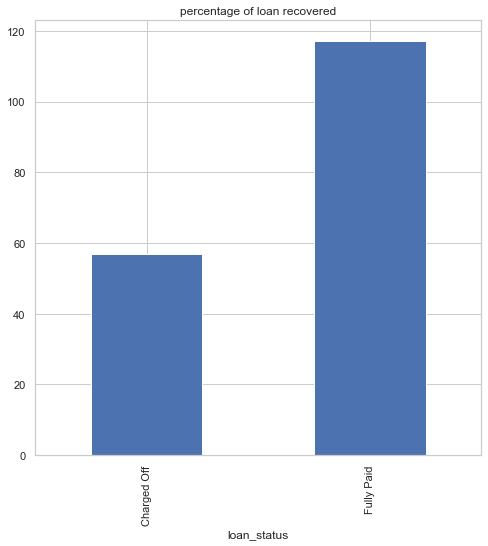

In [81]:
p = (loan.groupby('loan_status')['total_pymnt'].sum()*100/loan.groupby('loan_status')['loan_amnt'].sum())

plt.figure(figsize= (8,8))
plt.title('percentage of loan recovered')
p.plot.bar()
plt.show()

In [82]:
p

loan_status
Charged Off    56.76
Fully Paid    117.11
dtype: float64

Varaible Loan amount

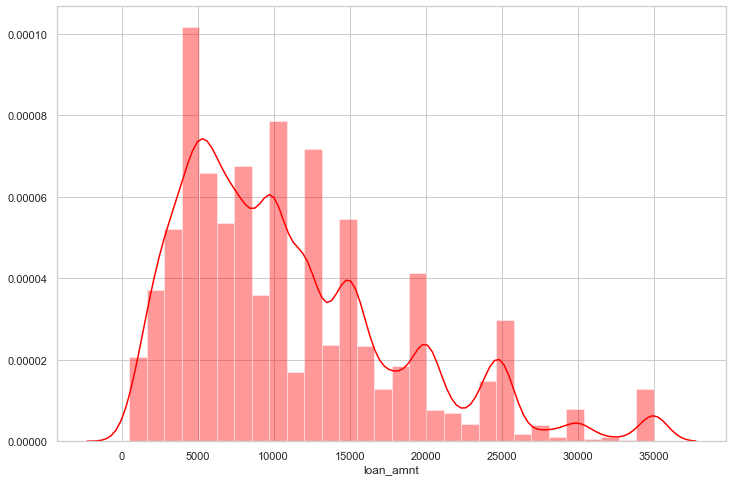

In [83]:
plt.figure(figsize=(12,8))
sns.distplot(loan['loan_amnt'], bins=30, color='red')
plt.show()

In [84]:
loan['loan_amnt'].describe()

count   36,874.00
mean    11,005.09
std      7,240.36
min        500.00
25%      5,400.00
50%      9,700.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

In [85]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00","12,209.47","8,017.02",900.00,"6,000.00","10,000.00","16,750.00","35,000.00"
Fully Paid,"31,611.00","10,804.57","7,083.09",500.00,"5,300.00","9,600.00","15,000.00","35,000.00"


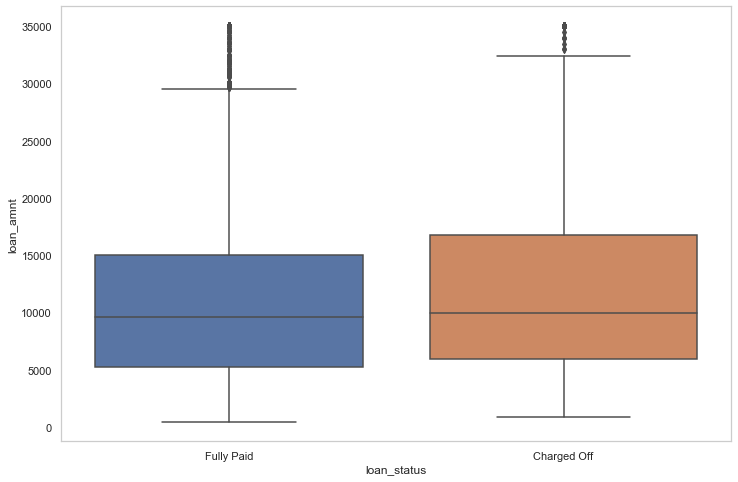

In [86]:
plt.figure(figsize=(12,8))
plt.grid()
sns.boxplot(x='loan_status', y='loan_amnt', data=loan)
plt.show()

Observation: Charged off loans average is higher with respect to full paid loans. it can be infered that bigger the amount requested more is the tendency of defaulting.

In [87]:
# binning loan amount

bins = [x for x in range(0, 36000, 5000)]

loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], bins, labels=[str(x)+'-'+str(x+5)+'k' for x in range(0,35,5)])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


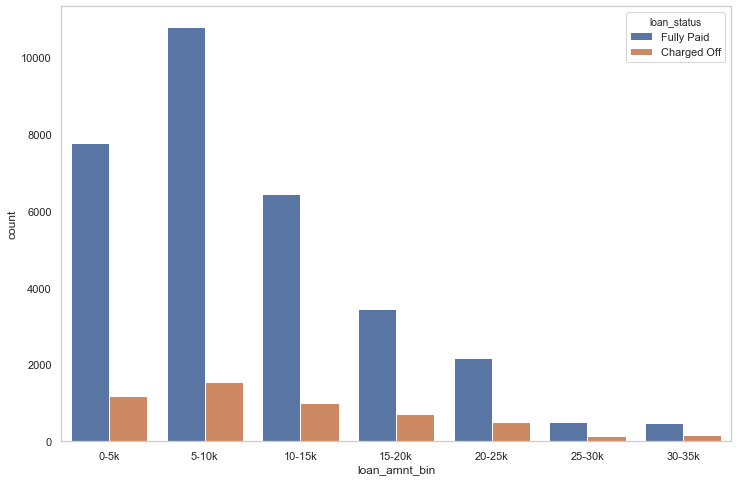

In [88]:
# countplot where hue is differntiating loan status for loan amount bin
plt.figure(figsize=(12,8))
plt.grid()
sns.countplot(x='loan_amnt_bin', data=loan, hue='loan_status')
plt.show()

In [89]:
loan.groupby('loan_status')['loan_amnt_bin'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5263,7,5-10k,1544
Fully Paid,31611,7,5-10k,10792


Variable - home_ownership

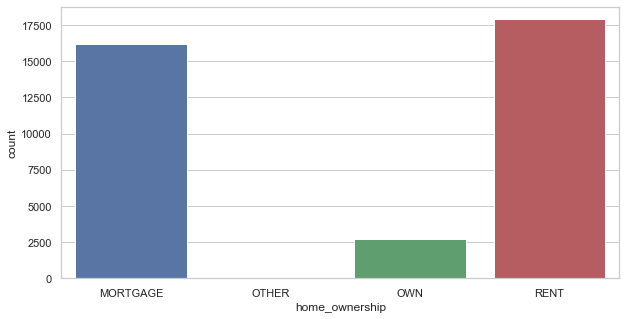

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(loan['home_ownership'], order=sorted(loan.home_ownership.unique()))
plt.show()

Observation maximum loan applicants are on rented home or have house mortgaged 

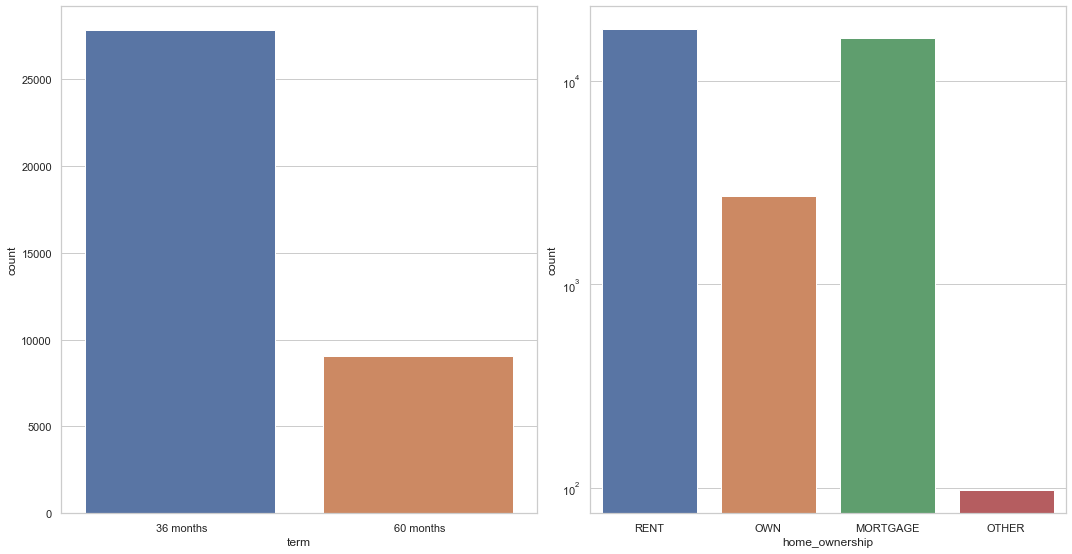

In [91]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x='term', data=loan)


plt.subplot(2,2,2)
sns.countplot(x='home_ownership', data=loan)
plt.yscale('log')

plt.tight_layout()

observation = 36 month term loan is in high demand mostly for paying mortgage and rents 

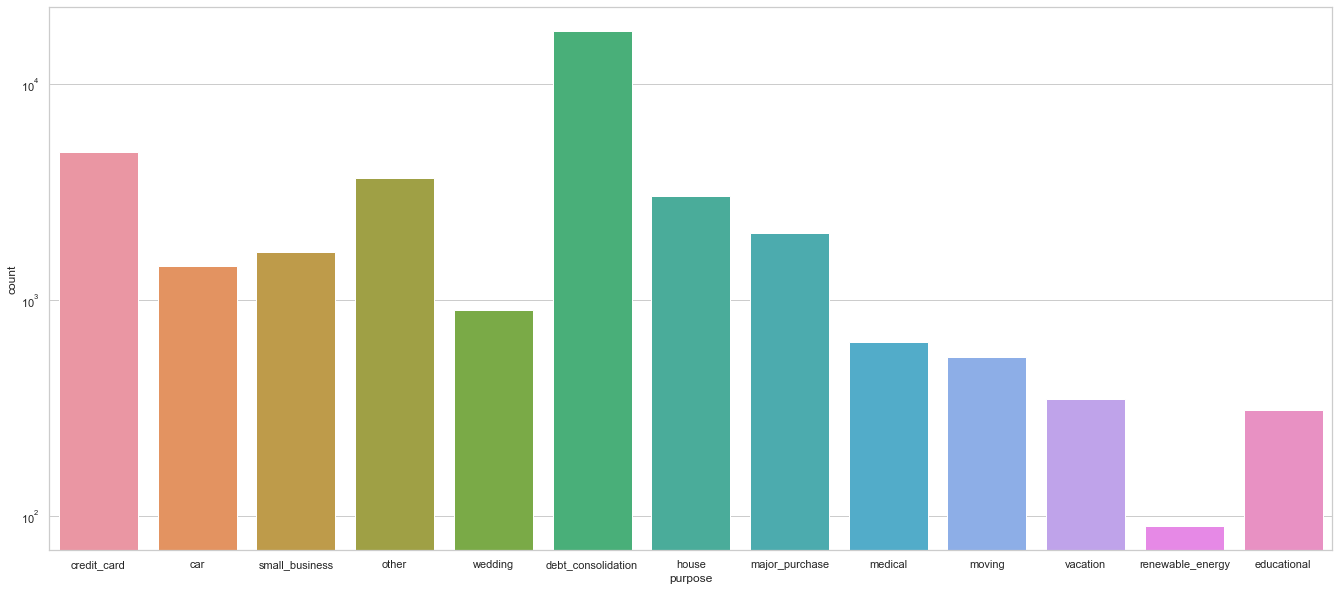

In [92]:
plt.figure(figsize=(23,10))
sns.countplot(x='purpose', data=loan)
plt.yscale('log')
plt.show()

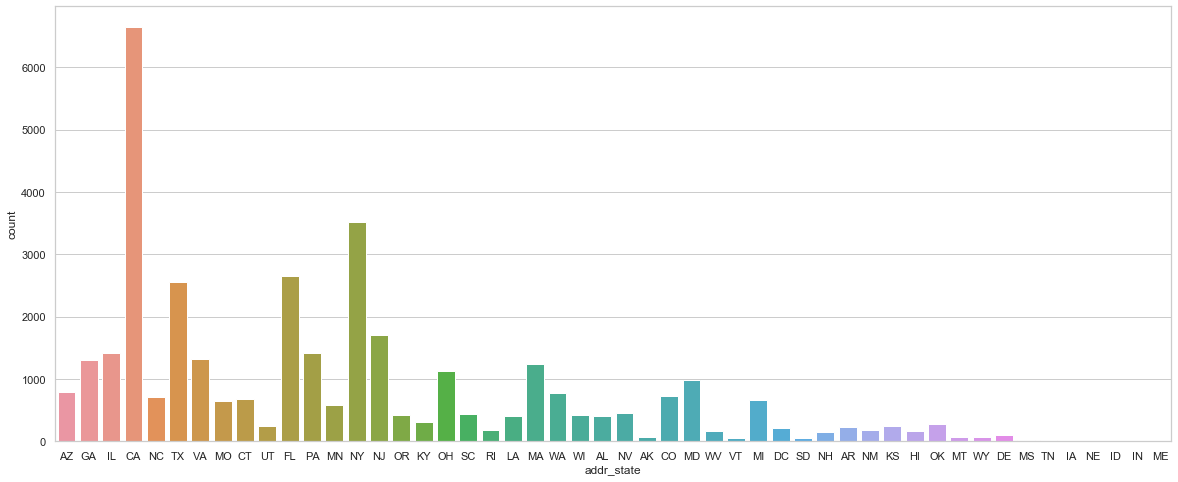

In [93]:
plt.figure(figsize=(20,8))
sns.countplot(x='addr_state', data=loan)
plt.show()

most loan were approved in california > new york >florida >texas

In [94]:
#loan[loan['loan_status'] == 'charged_off'].groupby('addr_state').count()

In [95]:
loan['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 36874, dtype: object

In [96]:
loan[loan['loan_status'] != 'Fully paid'].loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 36874, dtype: object

In [97]:
charged_off = loan[~(loan['loan_status'] == 'charged_off')]

In [98]:
charged_off_statewise =charged_off.groupby('addr_state').count()

In [99]:
charged_off_statewise.sort_values('loan_amnt', ascending = False)
#sns.distplot(charged_off_statewise['addr_state'])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_bin
addr_state,,,,,,,,,,,,,,,,,,,,,
CA,6644,6644,6644,6644,6644,6644,6644,6644,6644,6644,...,6644,6644,6644,6644,6644,6642,6644,6644,6644,6644
NY,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521,...,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521
FL,2651,2651,2651,2651,2651,2651,2651,2651,2651,2651,...,2651,2651,2651,2651,2651,2651,2651,2651,2651,2651
TX,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552,...,2552,2552,2552,2552,2552,2552,2552,2552,2552,2552
NJ,1713,1713,1713,1713,1713,1713,1713,1713,1713,1713,...,1713,1713,1713,1713,1713,1713,1713,1713,1713,1713
PA,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,...,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418
IL,1414,1414,1414,1414,1414,1414,1414,1414,1414,1414,...,1414,1414,1414,1414,1414,1414,1414,1414,1414,1414
VA,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,...,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
GA,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,...,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298


observation 
most charged off loan were also approved in california > new york >florida >texas

Grade and Subgrade 

In [100]:
loan['grade'].value_counts()

B    11194
A     9562
C     7516
D     4866
E     2534
F      921
G      281
Name: grade, dtype: int64

In [101]:
loan['sub_grade'].value_counts()

A4    2769
B3    2693
A5    2596
B5    2529
B4    2355
C1    1980
B2    1916
C2    1863
A3    1724
B1    1701
A2    1429
C3    1424
D2    1229
C4    1157
C5    1092
D3    1064
A1    1044
D1     895
D4     882
D5     796
E1     699
E2     584
E3     485
E4     411
E5     355
F1     290
F2     221
F3     165
F4     141
F5     104
G1      88
G2      72
G4      51
G3      43
G5      27
Name: sub_grade, dtype: int64

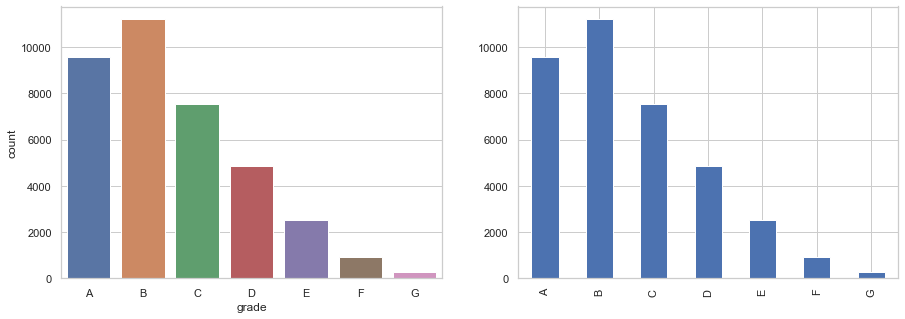

In [102]:
#for total loan 
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(x='grade', data=loan, order=['A', 'B','C','D','E','F','G'])

plt.subplot(1, 2, 2)
(loan['grade'].value_counts()).sort_index().plot.bar()

plt.show()

# for charged off loan 

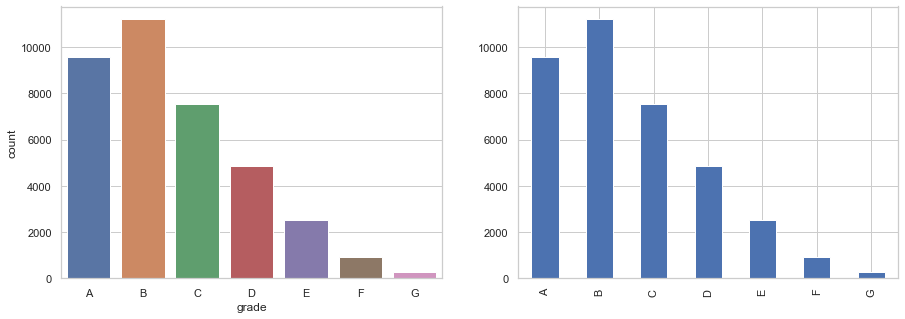

In [103]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(x='grade', data=charged_off, order=['A', 'B','C','D','E','F','G'])

plt.subplot(1, 2, 2)
(charged_off['grade'].value_counts()).sort_index().plot.bar()

plt.show()

In [104]:
charged_off

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_bin
0,5000,36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,...,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,1985,1,0-5k
1,2500,60 months,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,...,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,1999,4,0-5k
2,2400,36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,...,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,2001,11,0-5k
3,10000,36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,...,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,1996,2,5-10k
5,5000,36 months,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,...,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,2004,11,0-5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,"110,000.00",Not Verified,...,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,0.00,1990,11,0-5k
39713,8500,36 months,10.28,275.38,C,C1,3,RENT,"18,000.00",Not Verified,...,0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,0.00,1986,12,5-10k
39714,5000,36 months,8.07,156.84,A,A4,0,MORTGAGE,"100,000.00",Not Verified,...,0.00,0.00,0.00,2008-04-01,0.00,2007-06-01,0.00,1998,10,0-5k
39715,5000,36 months,7.43,155.38,A,A2,0,MORTGAGE,"200,000.00",Not Verified,...,0.00,0.00,0.00,2008-01-01,0.00,2007-06-01,0.00,1988,11,0-5k


In [105]:
loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_bin
0,5000,36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,...,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,1985,1,0-5k
1,2500,60 months,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,...,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,1999,4,0-5k
2,2400,36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,...,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,2001,11,0-5k
3,10000,36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,...,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,1996,2,5-10k
5,5000,36 months,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,...,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,2004,11,0-5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,"110,000.00",Not Verified,...,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,0.00,1990,11,0-5k
39713,8500,36 months,10.28,275.38,C,C1,3,RENT,"18,000.00",Not Verified,...,0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,0.00,1986,12,5-10k
39714,5000,36 months,8.07,156.84,A,A4,0,MORTGAGE,"100,000.00",Not Verified,...,0.00,0.00,0.00,2008-04-01,0.00,2007-06-01,0.00,1998,10,0-5k
39715,5000,36 months,7.43,155.38,A,A2,0,MORTGAGE,"200,000.00",Not Verified,...,0.00,0.00,0.00,2008-01-01,0.00,2007-06-01,0.00,1988,11,0-5k


Analysis of Interest Rate

In [106]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00",13.85,3.63,5.42,11.36,13.61,16.40,24.40
Fully Paid,"31,611.00",11.61,3.58,5.42,8.59,11.49,13.98,24.11


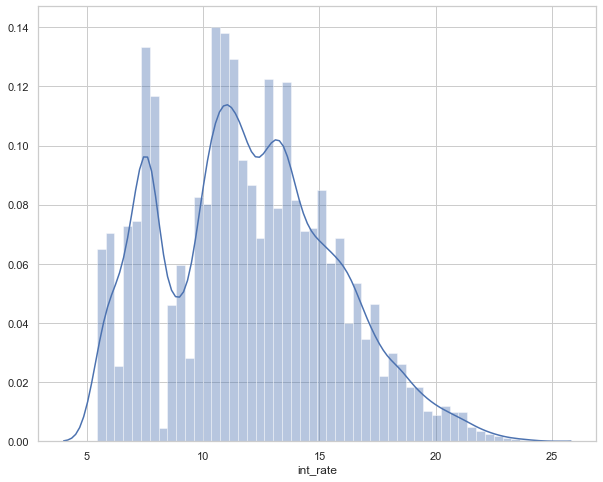

In [107]:
plt.figure(figsize=(10,8))
sns.distplot(loan['int_rate'], bins=50)
plt.show()

observation = three most common interest rates are approximately 7, 12 and 14 respectively
we can say most frequent interest rates lies between 7 to 14 percent 

dti variable A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


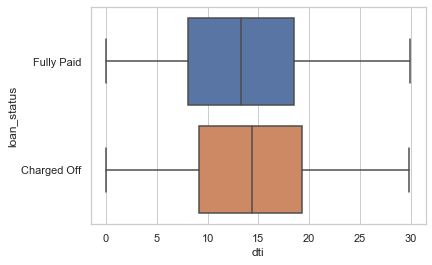

In [108]:

sns.boxplot(x=loan['dti'], y=loan['loan_status'], data=loan)

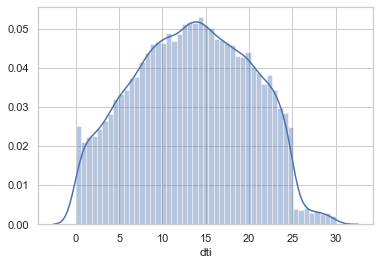

In [109]:
sns.distplot(loan['dti'])

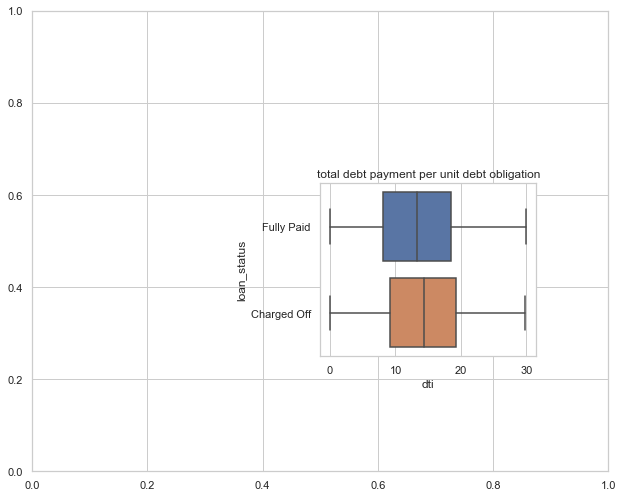

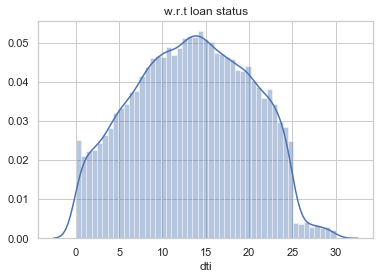

In [110]:

fig = plt.figure(figsize=(10,8))
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.5,0.3,0.3,0.3])

axes1 = sns.boxplot(x=loan['dti'], y=loan['loan_status'], data=loan)
axes1.set_title('total debt payment per unit debt obligation')
plt.show()
axes2 = sns.distplot(loan['dti'])
axes2.set_title('w.r.t loan status')
plt.show()


In [111]:
loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_bin
0,5000,36 months,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,...,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.00,1985,1,0-5k
1,2500,60 months,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,...,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,1999,4,0-5k
2,2400,36 months,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,...,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.00,2001,11,0-5k
3,10000,36 months,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,...,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,1996,2,5-10k
5,5000,36 months,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,...,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,2004,11,0-5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,"110,000.00",Not Verified,...,0.00,0.00,0.00,2010-07-01,80.90,2010-06-01,0.00,1990,11,0-5k
39713,8500,36 months,10.28,275.38,C,C1,3,RENT,"18,000.00",Not Verified,...,0.00,0.00,0.00,2010-07-01,281.94,2010-07-01,0.00,1986,12,5-10k
39714,5000,36 months,8.07,156.84,A,A4,0,MORTGAGE,"100,000.00",Not Verified,...,0.00,0.00,0.00,2008-04-01,0.00,2007-06-01,0.00,1998,10,0-5k
39715,5000,36 months,7.43,155.38,A,A2,0,MORTGAGE,"200,000.00",Not Verified,...,0.00,0.00,0.00,2008-01-01,0.00,2007-06-01,0.00,1988,11,0-5k


In [112]:
loan.dti

0       27.65
1        1.00
2        8.72
3       20.00
5       11.20
         ... 
39712   11.33
39713    6.40
39714    2.30
39715    3.72
39716   14.29
Name: dti, Length: 36874, dtype: float64

In [113]:
# defining a function that will take dataframe and column and plot 2 graph (distribution plot and boxplot)
def plot_distribution(dataframe,col):
    fig = plt.figure(figsize=(10,8))
    axes1 = fig.add_axes([0.5,0.3,0.3,0.3])
    axes2 = fig.add_axes([0.1,0.1,0.8,0.8])
                         
    axes1 = sns.distplot(dataframe[col])
    plt.show()
    axes2 = sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    axes2.set_title('w.r.t loan status')
    plt.show()
     
 

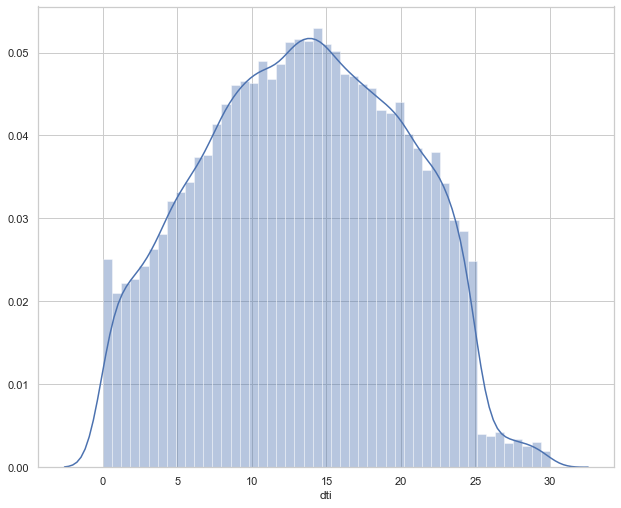

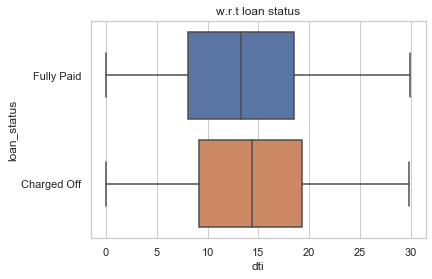

In [114]:
# checking the function with loan dataframe and dti column
plot_distribution(loan, 'dti')

loan_amnt = The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


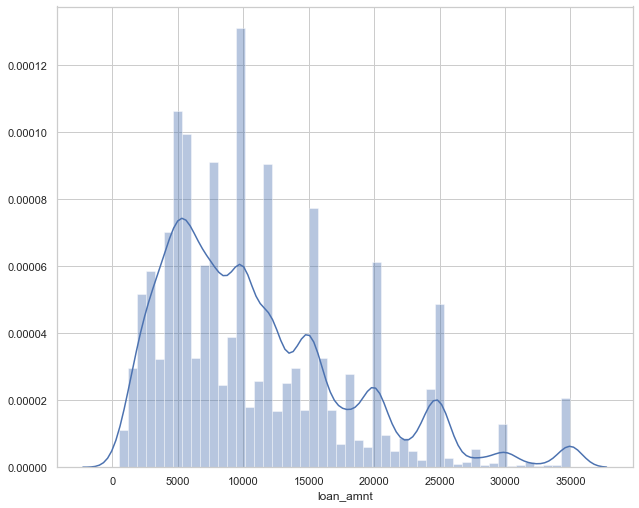

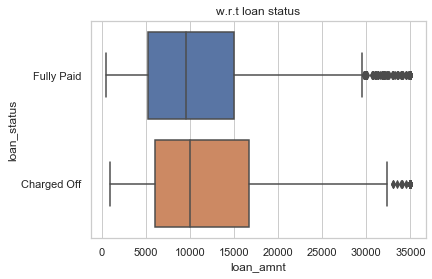

In [115]:
plot_distribution(loan, 'loan_amnt')

In [116]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00","12,209.47","8,017.02",900.00,"6,000.00","10,000.00","16,750.00","35,000.00"
Fully Paid,"31,611.00","10,804.57","7,083.09",500.00,"5,300.00","9,600.00","15,000.00","35,000.00"


Observation =  
Most of the loans granted are below 15k (75 percentile )
Funding amounts highest at 5k . 


int_rate = Interest Rate on the loan


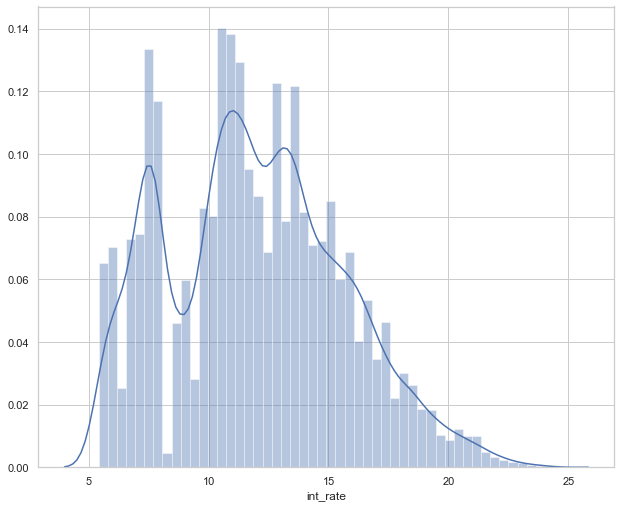

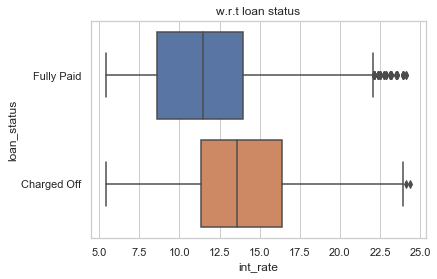

In [117]:
plot_distribution(loan, 'int_rate')

In [118]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00",13.85,3.63,5.42,11.36,13.61,16.40,24.40
Fully Paid,"31,611.00",11.61,3.58,5.42,8.59,11.49,13.98,24.11


Observation = 
 intrest rate ranges from 5.42% to 24.40% 
 charged off loan have has usually higher intereste rates also they were of higher values 

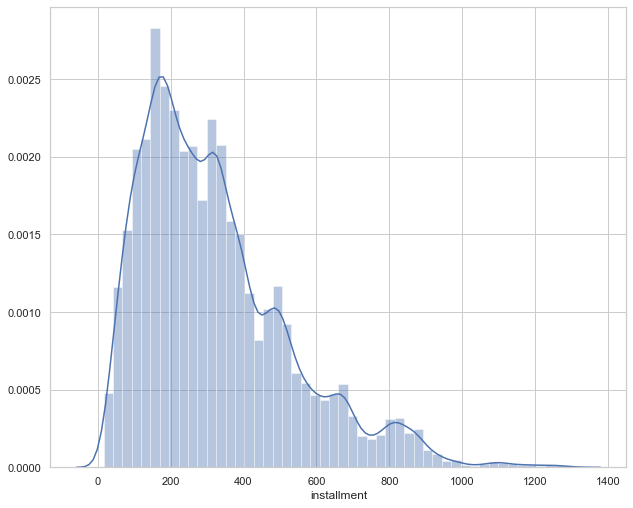

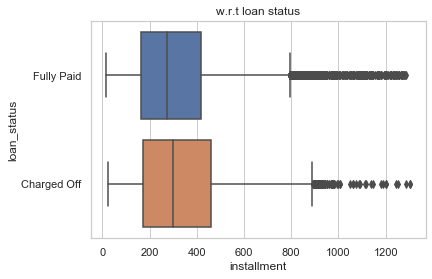

In [119]:
plot_distribution(loan, 'installment')

In [120]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00",338.27,214.34,22.79,171.81,297.53,459.25,"1,305.19"
Fully Paid,"31,611.00",318.36,203.40,15.69,165.74,275.53,417.22,"1,288.10"


observation = 
loans Charged Off have slightly higher installment 
lending club needs to keep the installment amount standard for all  


open_acc = The number of open credit lines in the borrower's credit file.


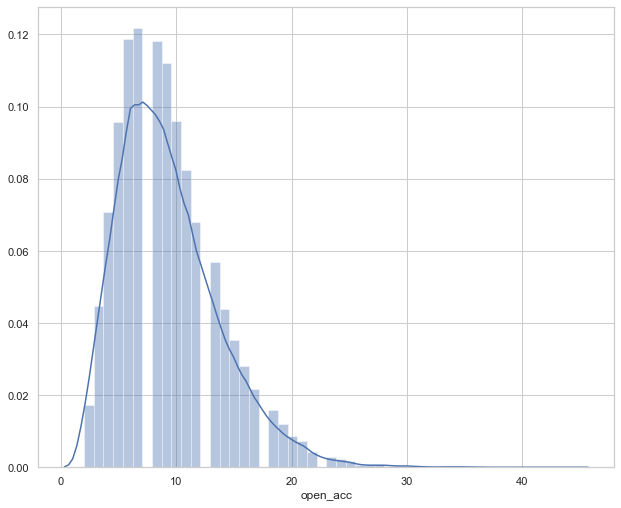

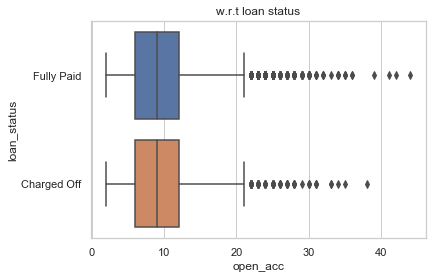

In [121]:
plot_distribution(loan, 'open_acc')

In [122]:
loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00",9.24,4.52,2.00,6.00,9.00,12.00,38.00
Fully Paid,"31,611.00",9.28,4.36,2.00,6.00,9.00,12.00,44.00


observations = maximum numbers of loan applicants have had 9 open credit lines 

total_acc = The total number of credit lines currently in the borrower's credit file


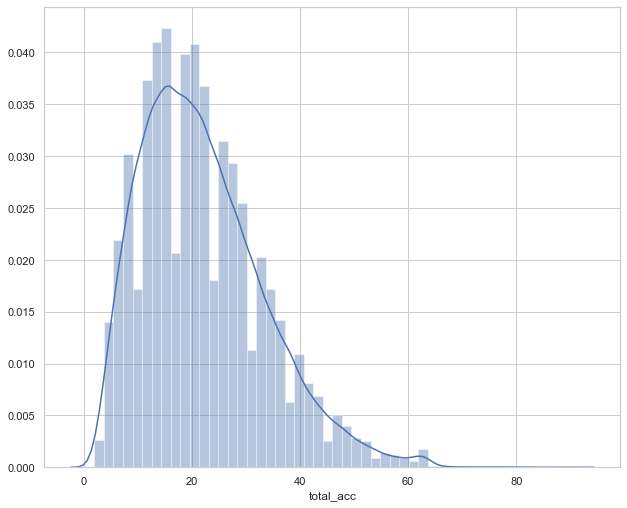

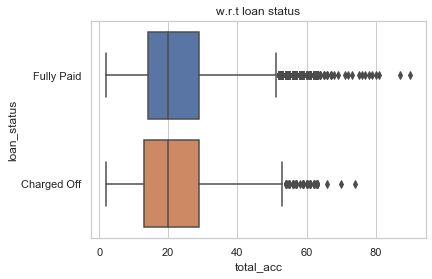

In [123]:
plot_distribution(loan, 'total_acc')

In [124]:
loan.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00",21.51,11.42,2.00,13.00,20.00,29.00,74.00
Fully Paid,"31,611.00",22.07,11.34,2.00,14.00,20.00,29.00,90.00


observation = avg credit line for loan applicants is approx 21.5
not much can be interpreted here 

total_pymnt = Payments received to date for total amount funded


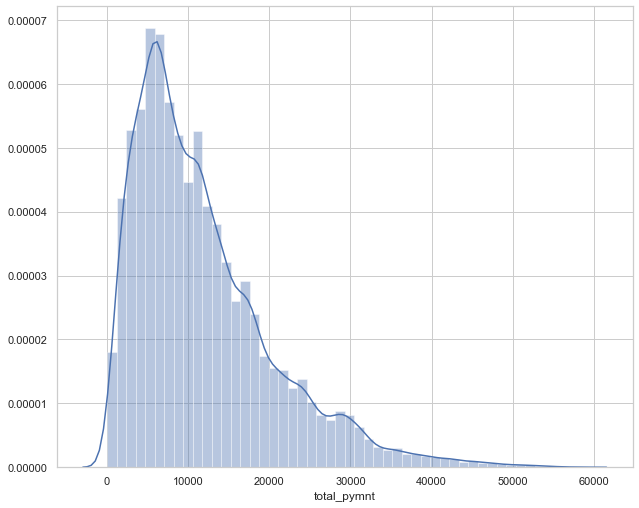

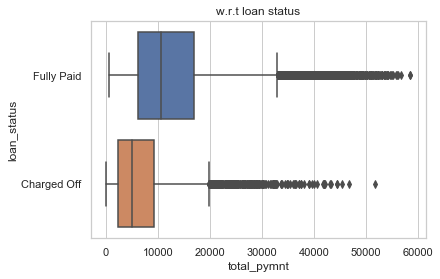

In [125]:
plot_distribution(loan, 'total_pymnt')

In [126]:
loan.groupby('loan_status')['total_pymnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00","6,929.96","6,564.23",33.73,"2,333.05","4,962.30","9,298.89","51,745.45"
Fully Paid,"31,611.00","12,653.26","8,706.44",526.33,"6,171.02","10,682.38","16,896.71","58,563.68"


observation = avg total payement for charged off loans is approximately half of the that of fully paid loans.

max loan amount is approximately same for both charged of and fully paid loans


inq_last_6mths = The number of inquiries in past 6 months (excluding auto and mortgage inquiries)



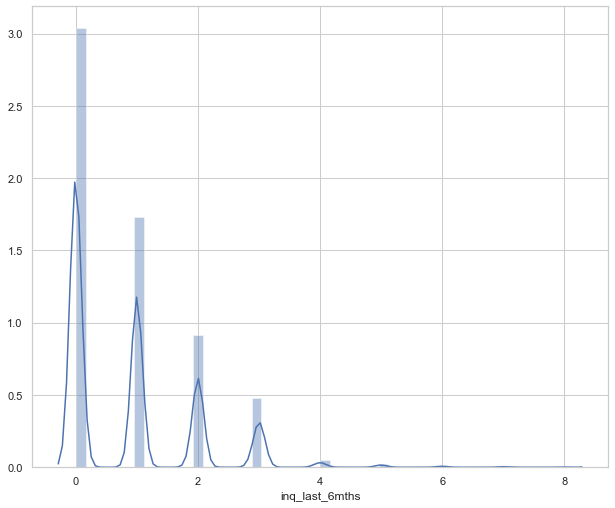

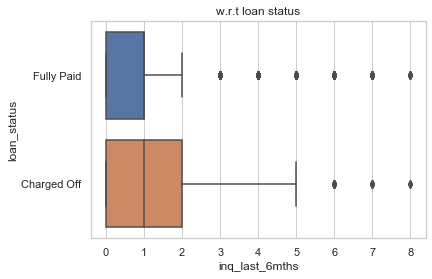

In [127]:
plot_distribution(loan, 'inq_last_6mths')

In [128]:
loan.groupby('loan_status')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00",1.05,1.15,0.00,0.00,1.00,2.00,8.00
Fully Paid,"31,611.00",0.84,1.05,0.00,0.00,1.00,1.00,8.00


observation = defaulters made more number of enquires in most(for more than 50 % defaulters) of the cases  


revol_bal = Total credit revolving balance



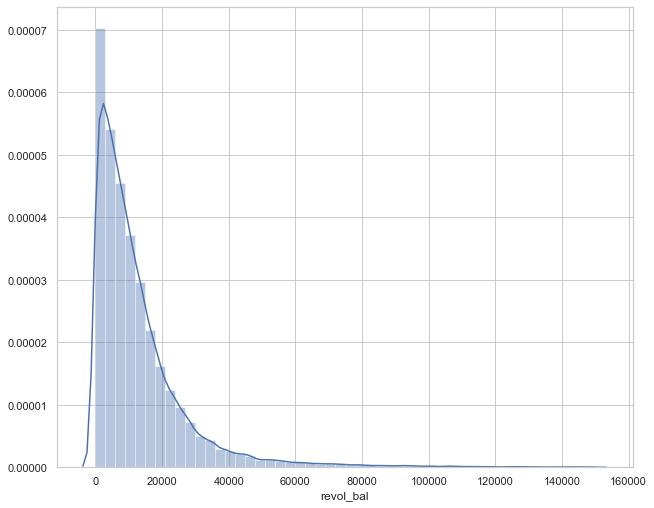

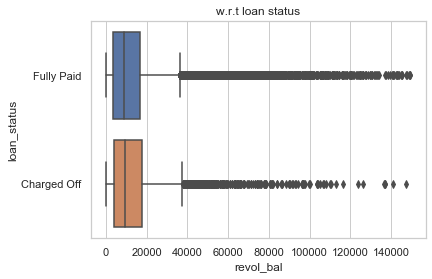

In [129]:
plot_distribution(loan, 'revol_bal')

In [130]:
loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00","13,525.94","14,920.25",0.00,"4,081.00","9,365.00","17,578.50","147,365.00"
Fully Paid,"31,611.00","12,966.29","15,206.80",0.00,"3,620.50","8,686.00","16,636.00","149,588.00"


observation 


revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


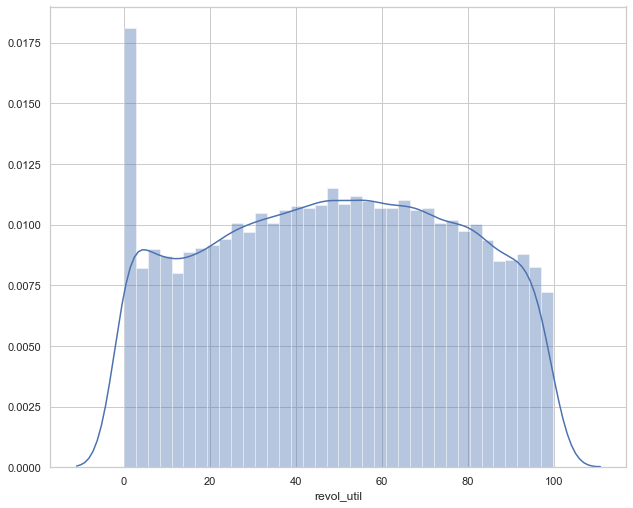

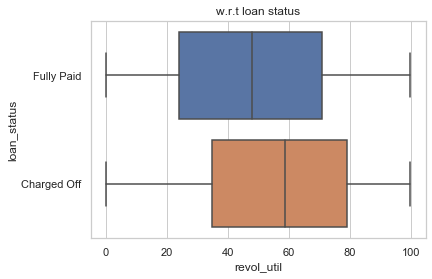

In [131]:
plot_distribution(loan, 'revol_util')

In [132]:
loan.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,263.00",55.77,27.84,0.00,34.75,58.70,79.15,99.90
Fully Paid,"31,611.00",47.67,28.22,0.00,24.10,47.80,70.90,99.90


observation = charged of have higer mean than fully paid loans 

# bivariate analysis

In [133]:
# correaltion plot with loan amount 
corr = loan.corr()
corr['loan_amnt']

loan_amnt                  1.00
int_rate                   0.30
installment                0.93
emp_length                 0.15
annual_inc                 0.41
dti                        0.07
delinq_2yrs               -0.04
inq_last_6mths             0.01
open_acc                   0.17
pub_rec                   -0.04
revol_bal                  0.31
revol_util                 0.06
total_acc                  0.25
out_prncp                   nan
out_prncp_inv               nan
total_pymnt                0.88
total_pymnt_inv            0.85
total_rec_prncp            0.84
total_rec_int              0.73
total_rec_late_fee         0.05
recoveries                 0.14
collection_recovery_fee    0.08
last_pymnt_amnt            0.47
pub_rec_bankruptcies      -0.03
earliest_cr_line_year     -0.18
earliest_cr_line_month    -0.01
Name: loan_amnt, dtype: float64

In [134]:
corr_var = list(loan.columns)

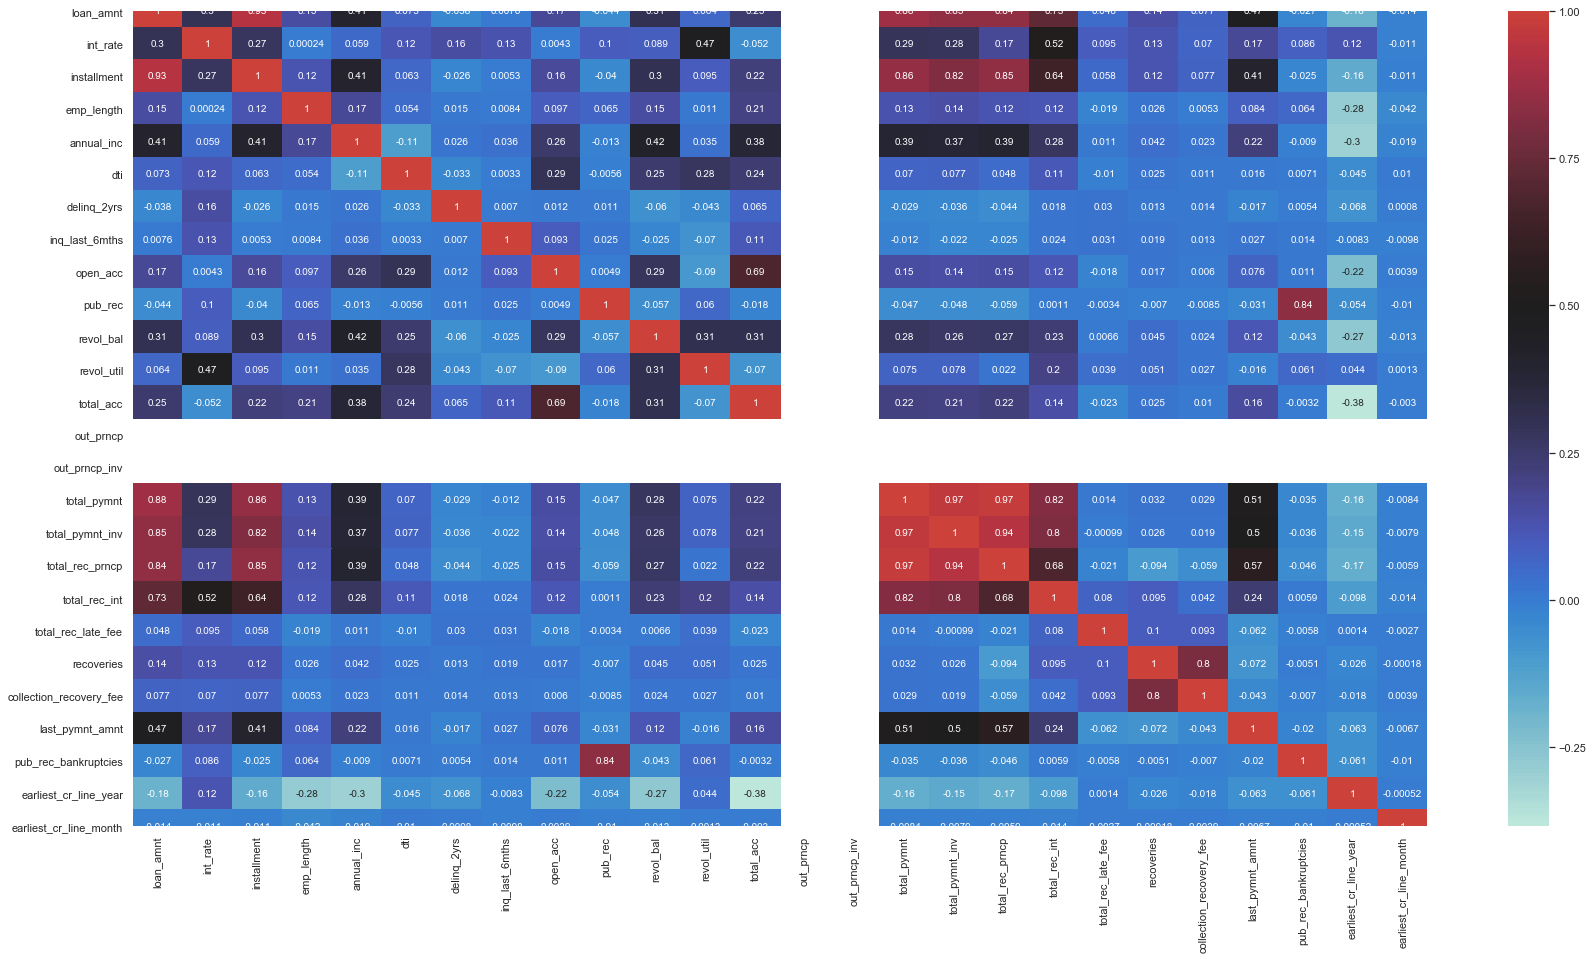

In [135]:
plt.figure(figsize=(29,15))
sns.heatmap(corr, annot=True, center=0.5)

corelation plot with charged off and fully paid variable 
lets convert charged of to 0 and fully paid to 1

In [136]:
# replacing target variable loan_status with values 'Fully Paid' and charged off to 0 and 1 respectively
loan['loan_status'].replace(to_replace = ['Fully Paid', 'Charged Off'], value = [0,1], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [137]:
# correaltion plot with loan amount 
corr_loan_status = loan.corr()
corr_loan_status['loan_status']

loan_amnt                  0.07
int_rate                   0.21
installment                0.03
emp_length                 0.02
annual_inc                -0.06
loan_status                1.00
dti                        0.04
delinq_2yrs                0.02
inq_last_6mths             0.07
open_acc                  -0.00
pub_rec                    0.05
revol_bal                  0.01
revol_util                 0.10
total_acc                 -0.02
out_prncp                   nan
out_prncp_inv               nan
total_pymnt               -0.23
total_pymnt_inv           -0.23
total_rec_prncp           -0.33
total_rec_int              0.02
total_rec_late_fee         0.17
recoveries                 0.34
collection_recovery_fee    0.20
last_pymnt_amnt           -0.22
pub_rec_bankruptcies       0.04
earliest_cr_line_year      0.02
earliest_cr_line_month    -0.02
Name: loan_status, dtype: float64

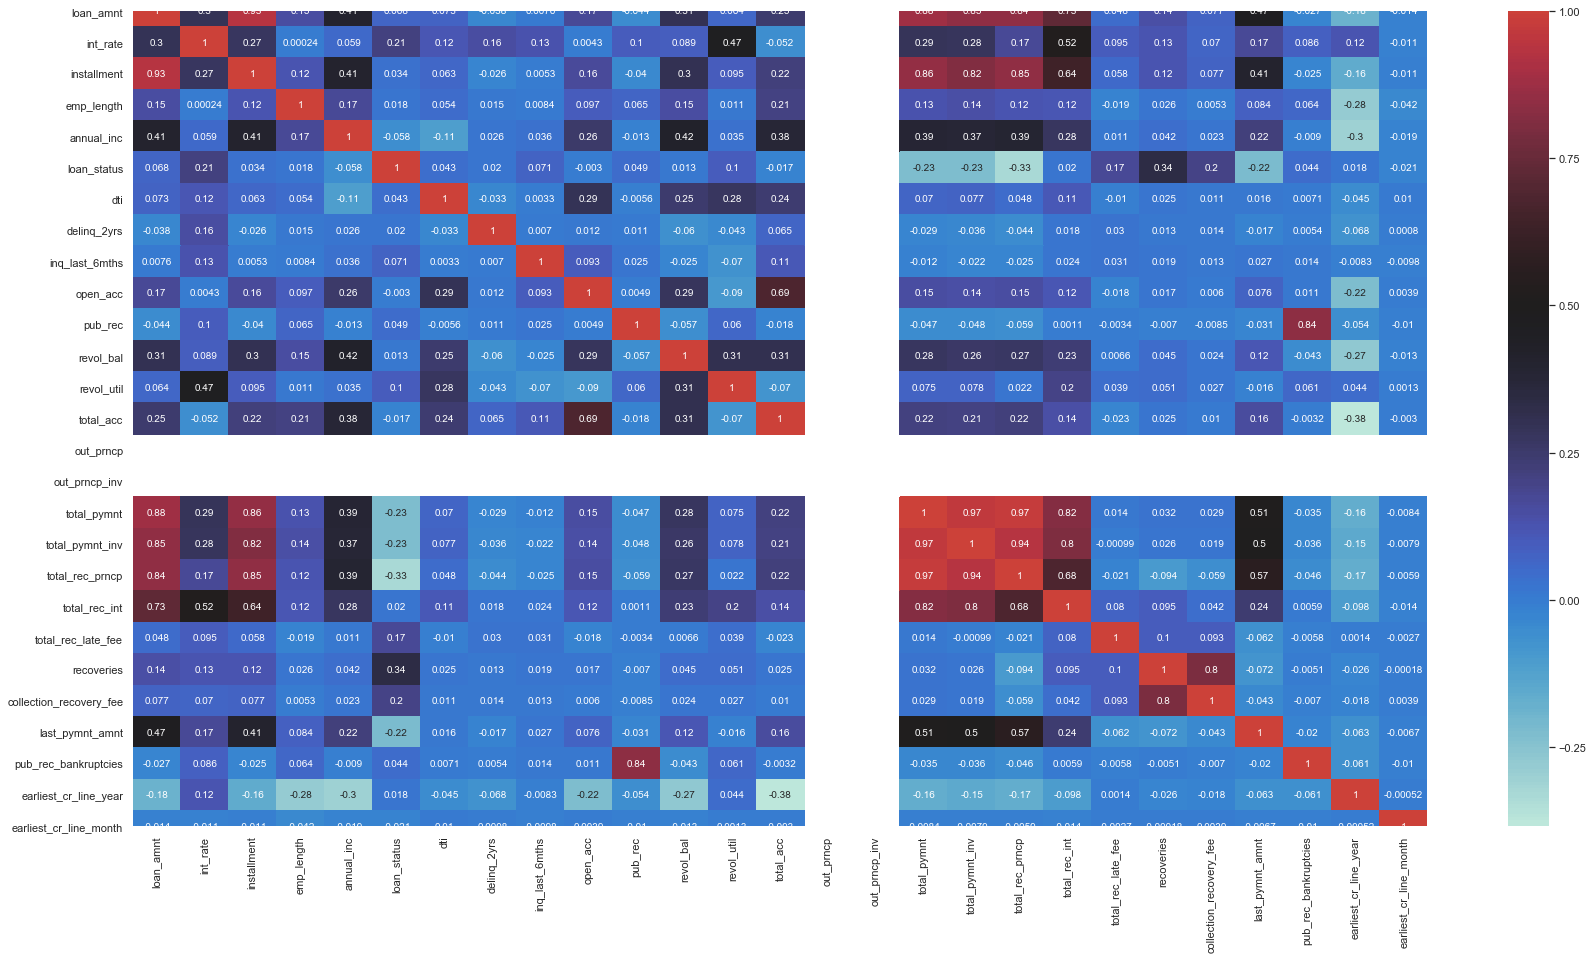

In [138]:
plt.figure(figsize=(29,15))
sns.heatmap(corr_loan_status, annot=True, center=0.5)

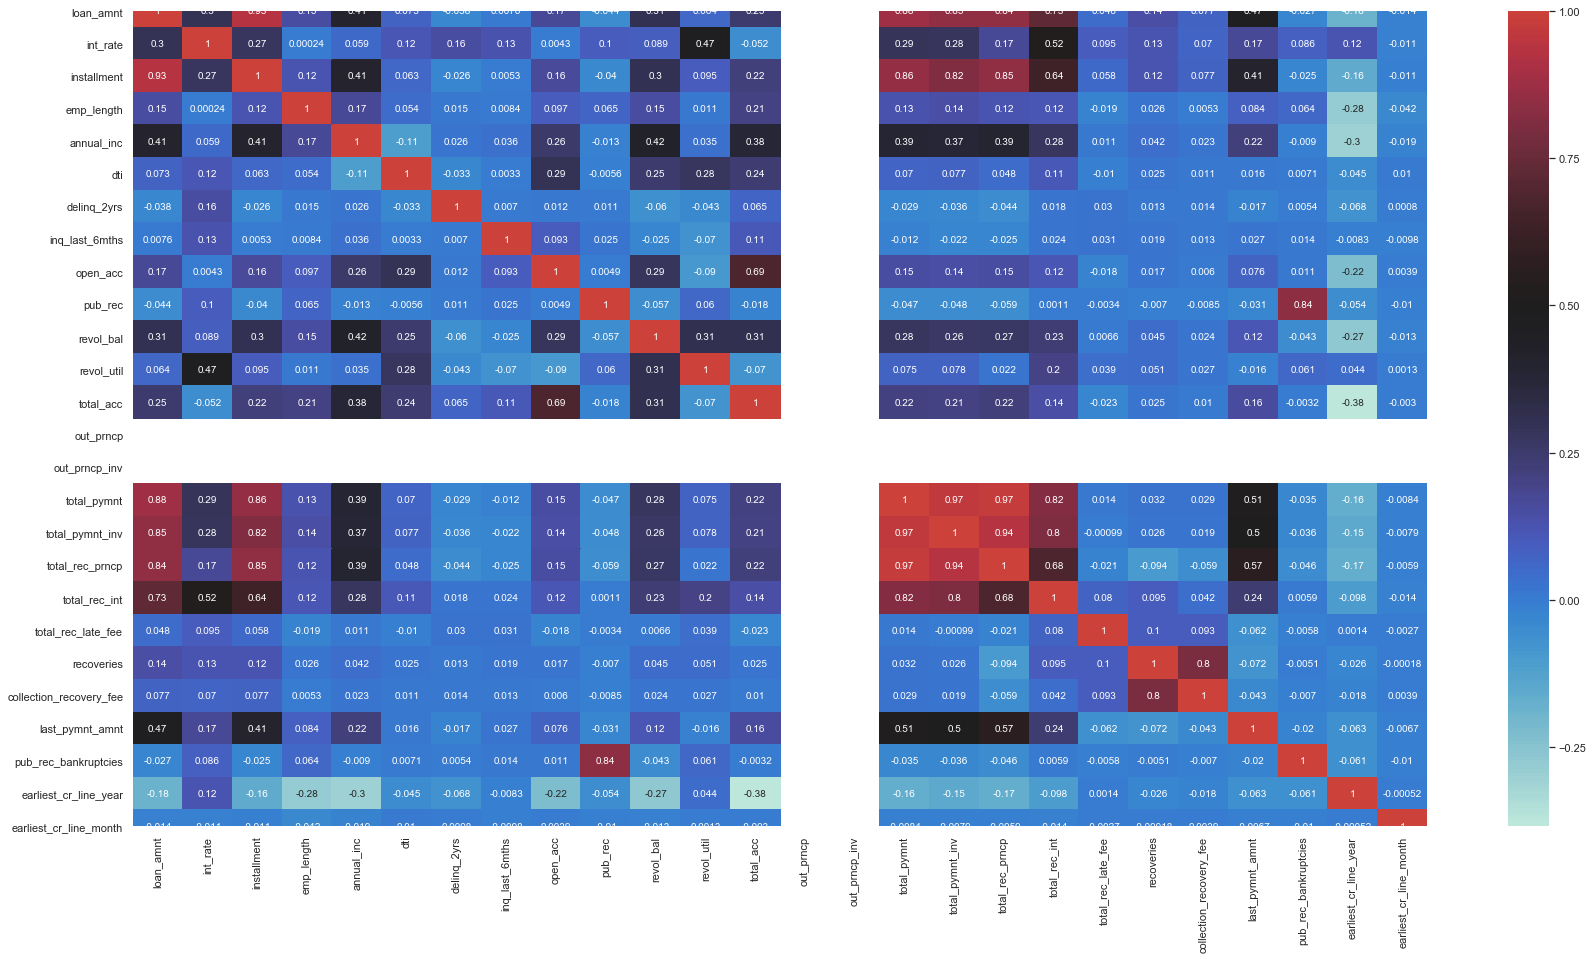

In [139]:
plt.figure(figsize=(29,15))
sns.heatmap(corr, annot=True, center=0.5)

observation 
1. corellation plot for variable loan amount and loan status (being 1 and 0 ) is similar


loan_amnt vs annual_inc

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


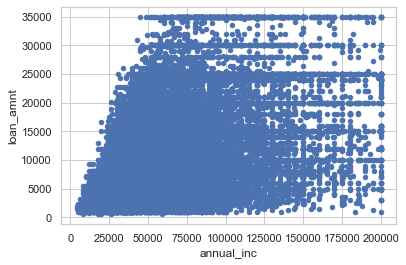

In [140]:

loan.plot.scatter(x = 'annual_inc' , y = 'loan_amnt')

observation  mostly people asking for loan is lower income group 